## 4.2.1 오차제곱합

In [1]:
import numpy as np

In [2]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [4]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [5]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [6]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [7]:
sum_squares_error(np.array(y), np.array(t))

0.5975

## 4.2.2 교차 엔트로피 오차

In [8]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [23]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [10]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [11]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [24]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [13]:
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## 4.2.3 미니배치 학습

In [14]:
import sys, os
sys.path.append(os.pardir)
from dlsm.dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [15]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [16]:
np.random.choice(60000, 10)

array([27000, 57578, 59906, 56703, 24819, 48427, 36919, 30851, 52336,
       46262])

## 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [35]:
## 정답 레이블이 one_hot_encoding일 때
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [34]:
## 정답 레이블이 숫자 레이블일 때
def crossdef cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arrange(batch_size), t] + 1e-7)) / batch_size

1

## 4.3.1 수치 미분

In [52]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

In [58]:
# 개선
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)

## 4.3.2 수치 미분의 예

In [59]:
def function_1(x):
    return 0.01 * x **2 + 0.1 * x

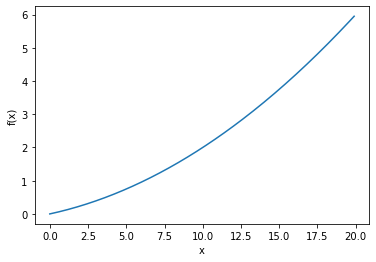

In [60]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [61]:
numerical_diff(function_1, 5)

0.1999999999990898

In [62]:
numerical_diff(function_1, 10)

0.2999999999986347

## 4.3.3 편미분

In [63]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2
    # 또는 return np.sum(x**2)

In [64]:
def function_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0

In [65]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [68]:
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

In [69]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 기울기

In [70]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    
    return grad

In [71]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [72]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [73]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

## 4.4.1 경사법 (경사하강법)

In [75]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [78]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

In [80]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

In [82]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100)

array([-2.99999994,  3.99999992])

## 4.4.2 신경망에서의 기울기

In [86]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dlsm.common.functions import softmax, cross_entropy_error
from dlsm.common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [87]:
net = simpleNet()

In [88]:
print(net.W)

[[ 0.27336711 -0.46714571  0.13961307]
 [ 0.45970668 -0.7458611   0.29106091]]


In [89]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.57775627 -0.95156241  0.34572267]


In [92]:
np.argmax(p)

0

In [98]:
t = np.array([1, 0, 0])

In [99]:
net.loss(x, t)

0.6979368501366418

In [100]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[-0.30143346  0.06469434  0.23673912]
 [-0.4521502   0.09704151  0.35510869]]


In [103]:
## 위와 같은 함수
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[-0.30143346  0.06469434  0.23673912]
 [-0.4521502   0.09704151  0.35510869]]


## 4.5 학습 알고리즘 구현하기

In [106]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dlsm.common.functions import *
from dlsm.common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [109]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
net.params['W1'].shape
net.params['b1'].shape
net.params['W2'].shape
net.params['b2'].shape

(10,)

In [110]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

grads['W1'].shape
grads['b1'].shape
grads['W2'].shape
grads['b2'].shape

(10,)

train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.7902666666666667, 0.7959
train acc, test acc | 0.8727833333333334, 0.8762
train acc, test acc | 0.89655, 0.8996
train acc, test acc | 0.9069833333333334, 0.9108
train acc, test acc | 0.9146666666666666, 0.9176
train acc, test acc | 0.9200166666666667, 0.9229
train acc, test acc | 0.9246833333333333, 0.9277
train acc, test acc | 0.9283833333333333, 0.9295
train acc, test acc | 0.9323, 0.9337
train acc, test acc | 0.9355, 0.9362
train acc, test acc | 0.93795, 0.938
train acc, test acc | 0.9407, 0.9405
train acc, test acc | 0.9430833333333334, 0.9433
train acc, test acc | 0.9454166666666667, 0.9444
train acc, test acc | 0.9472833333333334, 0.9448
train acc, test acc | 0.9494333333333334, 0.9464


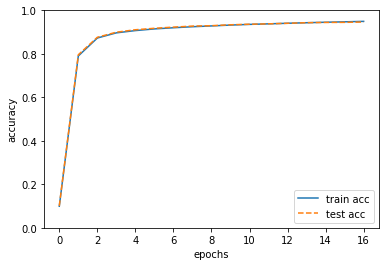

In [114]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dlsm.dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
